# წრფივი რეგრესია და რეგულარიზაცია - Lasso/Ridge/ElasticNet

## პროექტის მიმოხილვა

ამ პროექტში ჩვენ გამოვიკვლევთ წრფივ რეგრესიას და რეგულარიზაციის მეთოდებს (Lasso, Ridge, ElasticNet) ხილის მოსავლის (yield) პროგნოზირებაზე.

### მონაცემების წყარო
მონაცემები აღებულია Kaggle-ის ერთ-ერთი Competition-დან CSV ფორმატში და შეიცავს ინფორმაციას:
- **clonesize**: კლონის ზომა
- **Pollination species**: მტვრიანობის სპეციები (honeybee, bumbles, andrena, osmia)
- **Temperature data**: ტემპერატურის მონაცემები (MaxOfUpperTRange, MinOfUpperTRange, და ა.შ.)
- **Rain data**: წვიმიანი დღეები და საშუალო წვიმა
- **Fruit parameters**: fruitset, fruitmass, seeds
- **Target variable**: yield (მოსავალი)

## 1. საჭირო ბიბლიოთეკების იმპორტი

In [1]:
# მონაცემთა დამუშავებისთვის
import pandas as pd
import numpy as np

# ვიზუალიზაციისთვის
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning მოდელები და მეტრიკები
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# ვიზუალიზაციის პარამეტრები
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11


## 2. მონაცემების ჩატვირთვა

ვტვირთავთ train და test მონაცემებს და ვამოწმებთ მათ სტრუქტურას.

In [2]:
# მონაცემების ჩატვირთვა
train_df = pd.read_csv(r"C:\Users\Trujilo\Desktop\Data Science Projects\Linear_Regression_SK1\train.csv")
test_df = pd.read_csv(r"C:\Users\Trujilo\Desktop\Data Science Projects\Linear_Regression_SK1\test.csv")

print("="*60)
print("TRAIN DATASET")
print("="*60)
print(f"ზომა: {train_df.shape}")
print(f"ჩანაწერები: {train_df.shape[0]:,}")
print(f"ფიჩერები: {train_df.shape[1]}\n")

print("="*60)
print("TEST DATASET")
print("="*60)
print(f"ზომა: {test_df.shape}")
print(f"ჩანაწერები: {test_df.shape[0]:,}")
print(f"ფიჩერები: {test_df.shape[1]}\n")

print("\nპირველი 5 ჩანაწერი:")
display(train_df.head())

TRAIN DATASET
ზომა: (15000, 19)
ჩანაწერები: 15,000
ფიჩერები: 19

TEST DATASET
ზომა: (10000, 18)
ჩანაწერები: 10,000
ფიჩერები: 18


პირველი 5 ჩანაწერი:


,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,264.0,12.5,0.25,0.25,0.63,0.50,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.520181,0.436777,36.924839,6299.22636
1,1,690.0,25.0,0.50,0.38,0.63,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.494907,0.446451,34.838815,5892.16100
2,2,155.0,12.5,0.25,0.25,0.38,0.38,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.527190,0.465807,37.331606,6620.09877
3,3,595.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.470593,0.411272,33.441606,5663.06579
4,4,732.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.462013,0.438670,34.092917,5439.42150


## 3. მონაცემთა საწყისი ანალიზი (EDA)

### 3.1 მონაცემების ზოგადი ინფორმაცია

In [3]:
print("\n" + "="*60)
print("მონაცემების საბაზისო ინფორმაცია:")
print("="*60)
train_df.info()


მონაცემების საბაზისო ინფორმაცია:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null

### 3.2 ნულოვანი მონაცემების შემოწმება

ვამოწმებთ არის თუ არა ნულოვანი მნიშვნელობები (null values) მონაცემებში.

In [4]:
# ნულოვანი მონაცემების შემოწმება
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

print("Null მონაცემები Train Dataset-ში:")
if missing_train.sum() == 0:
    print("არ არის Null მონაცემები training set-ში!")

print("\n Null მონაცემები Test Dataset-ში:")
if missing_test.sum() == 0:
    print("არ არის Null მონაცემები test set-ში!")

Null მონაცემები Train Dataset-ში:
არ არის Null მონაცემები training set-ში!

 Null მონაცემები Test Dataset-ში:
არ არის Null მონაცემები test set-ში!


### 3.3 სტატისტიკური მახასიათებლები

ვიკვლევთ თითოეული ფიჩერის სტატისტიკურ განაწილებას.

In [5]:
# სტატისტიკური მახასიათებლები
print("სტატისტიკური მახასიათებლები:")
display(train_df.describe().T)

სტატისტიკური მახასიათებლები:


,count,mean,std,min,25%,50%,75%,max
id,15000.0,7499.500000,4330.271354,0.000000,3749.750000,7499.500000,11249.250000,14999.000000
Row#,15000.0,427.658467,213.167855,0.000000,248.000000,469.000000,597.000000,778.000000
clonesize,15000.0,19.773733,6.639363,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15000.0,0.383802,0.250479,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15000.0,0.284161,0.058235,0.000000,0.250000,0.250000,0.380000,0.390000
andrena,15000.0,0.486904,0.147250,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15000.0,0.590169,0.144731,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15000.0,82.245920,9.109809,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15000.0,49.713973,5.525859,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15000.0,68.715427,7.610720,55.900000,64.700000,71.900000,71.900000,79.000000


### 3.4 Target Variable-ის (yield) ანალიზი

ვაანალიზებთ სამიზნე ცვლადს - yield (მოსავალი).

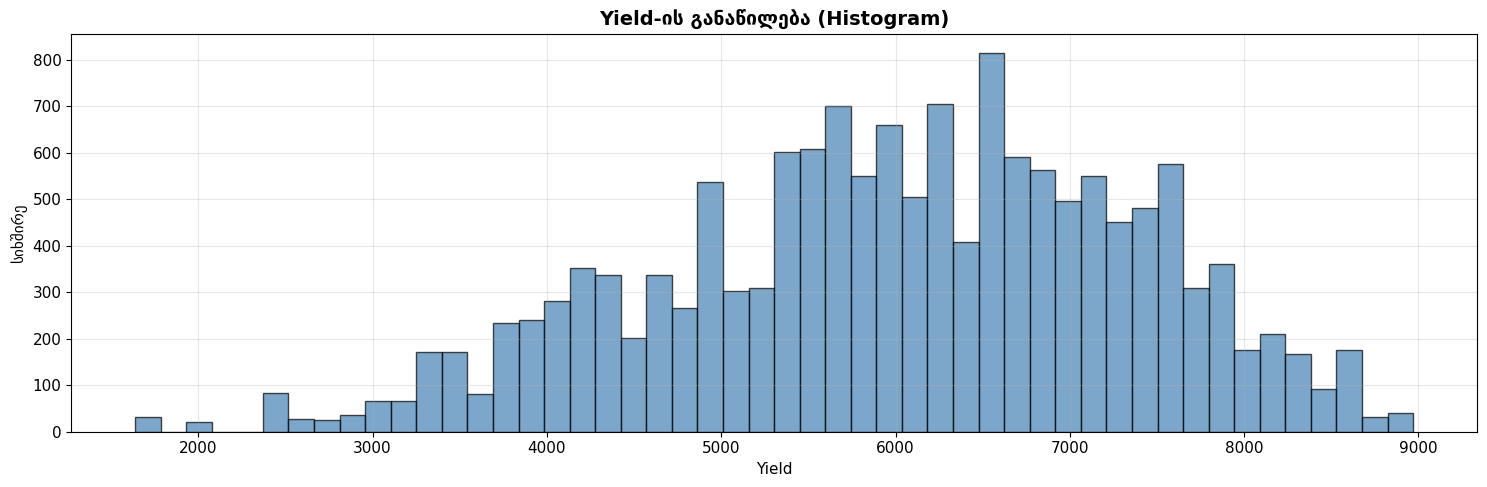

Yield-ის საშუალო: 6006.18
Yield-ის მედიანა: 6102.76
Yield-ის სტანდარტული გადახრა: 1355.71
Yield-ის მინიმუმი: 1637.70
Yield-ის მაქსიმუმი: 8969.40


In [6]:
# Target variable-ის ანალიზი
fig, axes = plt.subplots(1,1, figsize=(15, 5))

# Histogram
axes.hist(train_df['yield'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes.set_title('Yield-ის განაწილება (Histogram)', fontsize=14, fontweight='bold')
axes.set_xlabel('Yield')
axes.set_ylabel('სიხშირე')
axes.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Yield-ის საშუალო: {train_df['yield'].mean():.2f}")
print(f"Yield-ის მედიანა: {train_df['yield'].median():.2f}")
print(f"Yield-ის სტანდარტული გადახრა: {train_df['yield'].std():.2f}")
print(f"Yield-ის მინიმუმი: {train_df['yield'].min():.2f}")
print(f"Yield-ის მაქსიმუმი: {train_df['yield'].max():.2f}")

### 3.5 კორელაციის ანალიზი

ვიკვლევთ ფიჩერებს შორის კორელაციას და მათ ურთიერთკავშირს target variable-თან.

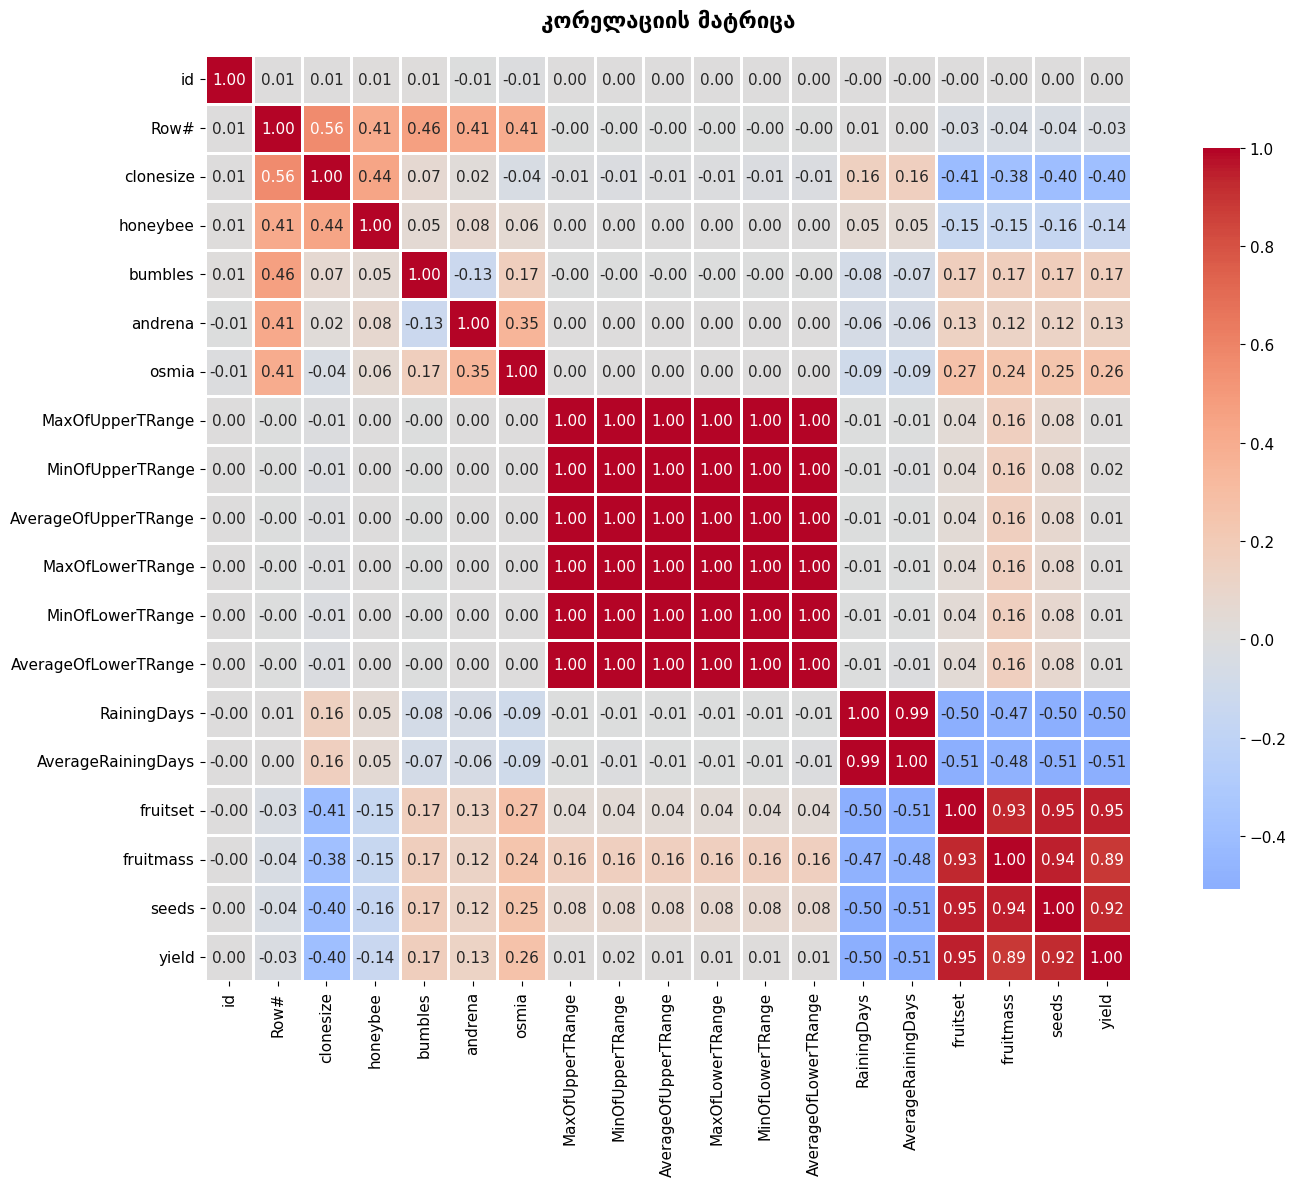


ფიჩერების კორელაცია yield-თან:
yield                   1.000000
fruitset                0.949402
seeds                   0.920219
fruitmass               0.886789
osmia                   0.262460
bumbles                 0.166866
andrena                 0.132867
MinOfUpperTRange        0.015022
AverageOfLowerTRange    0.014664
MinOfLowerTRange        0.014525
AverageOfUpperTRange    0.014257
MaxOfUpperTRange        0.014230
MaxOfLowerTRange        0.014190
id                      0.002037
Row#                   -0.025876
honeybee               -0.144440
clonesize              -0.395714
RainingDays            -0.496511
AverageRainingDays     -0.507159
Name: yield, dtype: float64


In [7]:
# კორელაციის მატრიცა
correlation_matrix = train_df.corr(numeric_only=True)

# ვიზუალიზაცია
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('კორელაციის მატრიცა', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ყველაზე მნიშვნელოვანი კორელაციები yield-თან
yield_correlation = correlation_matrix['yield'].sort_values(ascending=False)
print("\nფიჩერების კორელაცია yield-თან:")
print(yield_correlation)

### 3.6 ყველაზე მნიშვნელოვანი ფიჩერების ვიზუალიზაცია

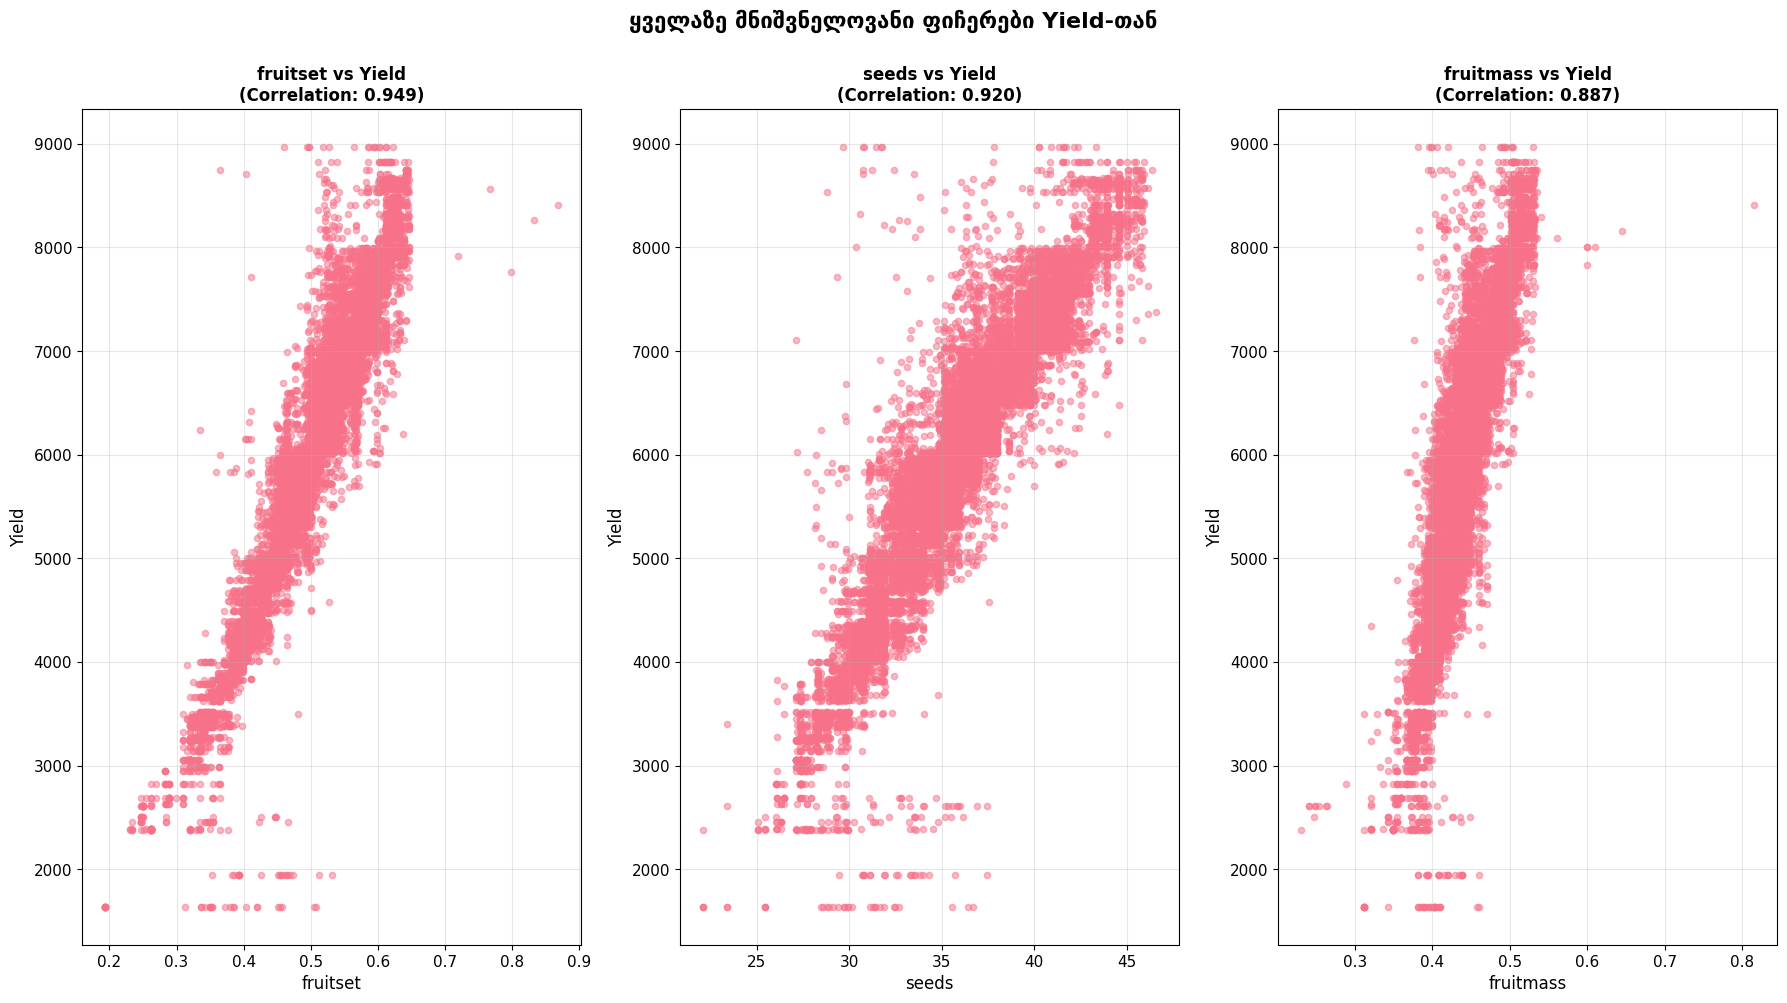

In [8]:
# ყველაზე მაღალი კორელაციის მქონე ფიჩერები (yield-ის გარდა)
top_features = yield_correlation.drop('yield').head(3)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features.index):
    axes[idx].scatter(train_df[feature], train_df['yield'], alpha=0.5, s=20)
    axes[idx].set_xlabel(feature, fontsize=12)
    axes[idx].set_ylabel('Yield', fontsize=12)
    axes[idx].set_title(f'{feature} vs Yield\n(Correlation: {top_features[feature]:.3f})', 
                        fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('ყველაზე მნიშვნელოვანი ფიჩერები Yield-თან', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 4. მონაცემების დამუშავება და მომზადება

### 4.1 Features და Target-ის გამოყოფა

In [9]:
# უსარგებლო სვეტების ამოშლა (id და Row# არ არის პრედიქტიული ფიჩერები)
columns_to_drop = ['id', 'Row#']

# Features და Target გამოყოფა
X = train_df.drop(columns=columns_to_drop + ['yield'])
y = train_df['yield']

# Test dataset-ის Features
X_test_final = test_df.drop(columns=columns_to_drop)

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Test Features shape: {X_test_final.shape}")

Features (X) shape: (15000, 16)
Target (y) shape: (15000,)
Test Features shape: (10000, 16)


### 4.2 Train/Validation Split

ვყოფთ training მონაცემებს train და validation ნაწილებად (80/20).

In [10]:
# Train/Validation Split (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("მონაცემების დაყოფა:")
print(f"Training set: {X_train.shape[0]:,} ჩანაწერი ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:,} ჩანაწერი ({X_val.shape[0]/len(X)*100:.1f}%)")

მონაცემების დაყოფა:
Training set: 12,000 ჩანაწერი (80.0%)
Validation set: 3,000 ჩანაწერი (20.0%)


### 4.3 Feature Scaling (სტანდარტიზაცია)

ვახდენთ ფიჩერების სტანდარტიზაციას (standardization), რაც განსაკუთრებით მნიშვნელოვანია რეგულარიზაციის მეთოდებისთვის.

In [11]:
# სტანდარტიზაცია - მნიშვნელოვანია რეგულარიზაციისთვის
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_final_scaled = scaler.transform(X_test_final)

print(f"\nსტანდარტიზებული Training data shape: {X_train_scaled.shape}")
print(f"სტანდარტიზებული Validation data shape: {X_val_scaled.shape}")
print(f"სტანდარტიზებული Test data shape: {X_test_final_scaled.shape}")


სტანდარტიზებული Training data shape: (12000, 16)
სტანდარტიზებული Validation data shape: (3000, 16)
სტანდარტიზებული Test data shape: (10000, 16)


## 5. Linear Regression მოდელის ტრენინგი

ვიწყებთ baseline მოდელის - უბრალო წრფივი რეგრესიის (LinearRegression) ტრენინგით, რომ შემდეგ შევადაროთ რეგულარიზებულ მოდელებს.

In [12]:
# Linear Regression მოდელის შექმნა და ტრენინგი
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# პროგნოზები
y_train_pred_linear = linear_model.predict(X_train_scaled)
y_val_pred_linear = linear_model.predict(X_val_scaled)


## 6. შეფასების მეტრიკების არჩევა და Linear Regression-ის შეფასება

### შეფასების მეტრიკები:
- **MSE (Mean Squared Error)**: საშუალო კვადრატული შეცდომა - ფასდება დიდი შეცდომები
- **RMSE (Root Mean Squared Error)**: MSE-ის ფესვი - გამოხატულია target-ის ერთეულებში
- **MAE (Mean Absolute Error)**: საშუალო აბსოლუტური შეცდომა - ნაკლებად მგრძნობიარეა outliers-ზე
- **R² Score**: განმარტებულია დისპერსია - მოდელი რამდენად კარგად აღწერს მონაცემებს

In [13]:
def evaluate_model(y_true, y_pred, dataset_name):
    """
    მოდელის შეფასების ფუნქცია
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print("="*50)
    print(f"MSE (Mean Squared Error):  {mse:,.2f}")
    print(f"RMSE (Root MSE):           {rmse:,.2f}")
    print(f"MAE (Mean Absolute Error): {mae:,.2f}")
    print(f"R² Score:                  {r2:.4f}")
    
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Linear Regression შეფასება
print("\n" + "="*60)
print("LINEAR REGRESSION - შეფასება")
print("="*60)

linear_train_metrics = evaluate_model(y_train, y_train_pred_linear, "Training Set")
linear_val_metrics = evaluate_model(y_val, y_val_pred_linear, "Validation Set")


LINEAR REGRESSION - შეფასება

Training Set Metrics:
MSE (Mean Squared Error):  164,995.20
RMSE (Root MSE):           406.20
MAE (Mean Absolute Error): 267.68
R² Score:                  0.9110

Validation Set Metrics:
MSE (Mean Squared Error):  173,037.87
RMSE (Root MSE):           415.98
MAE (Mean Absolute Error): 275.44
R² Score:                  0.9026


### წრფივი რეგრესიის კოეფიციენტები

ვნახოთ რომელი ფიჩერები ახდენენ ყველაზე მეტად გავლენას პროგნოზზე.

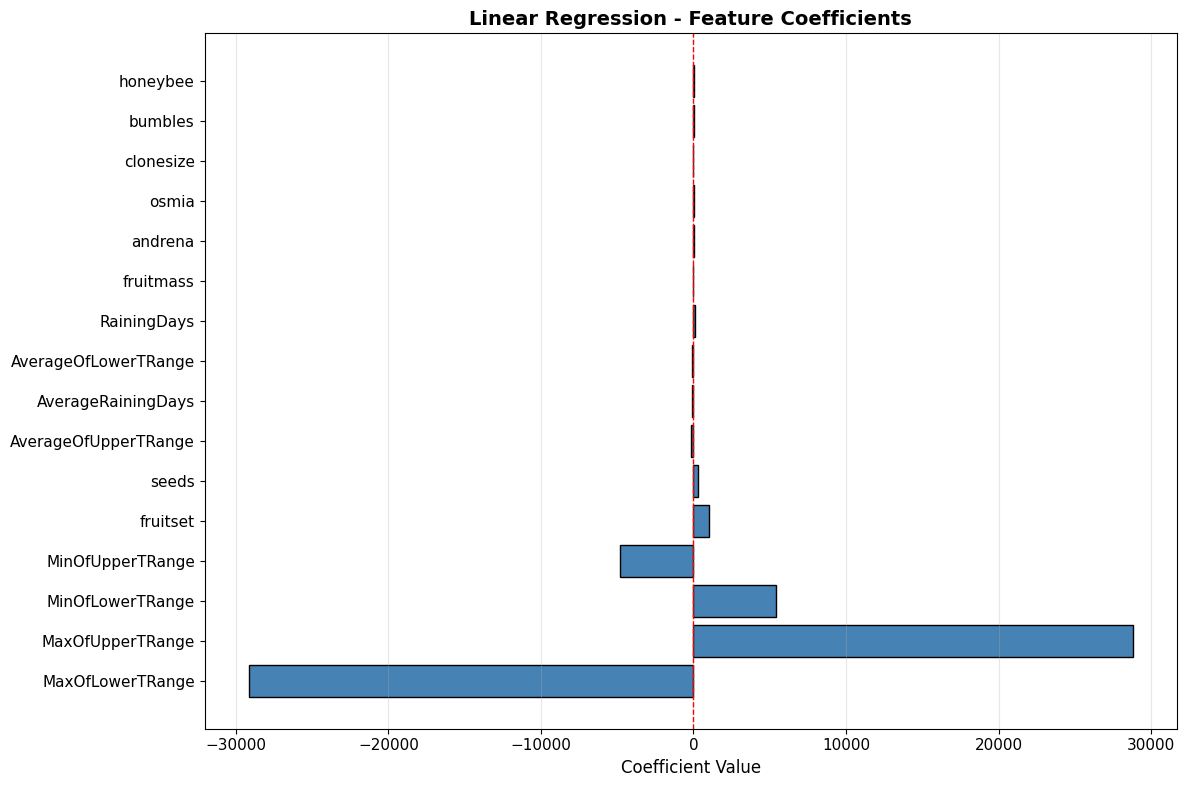


Top 10 ყველაზე მნიშვნელოვანი ფიჩერი (კოეფიციენტების აბსოლუტური მნიშვნელობით):


,Feature,Coefficient
8,MaxOfLowerTRange,-29159.422787
5,MaxOfUpperTRange,28806.066378
9,MinOfLowerTRange,5411.192830
6,MinOfUpperTRange,-4824.205356
13,fruitset,1006.711690
15,seeds,310.967064
7,AverageOfUpperTRange,-176.454827
12,AverageRainingDays,-106.138214
10,AverageOfLowerTRange,-105.674060
11,RainingDays,75.465094


In [14]:
# კოეფიციენტების ვიზუალიზაცია
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='steelblue', edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Linear Regression - Feature Coefficients', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

print("\nTop 10 ყველაზე მნიშვნელოვანი ფიჩერი (კოეფიციენტების აბსოლუტური მნიშვნელობით):")
display(coefficients.head(10))

### Prediction vs Actual ვიზუალიზაცია

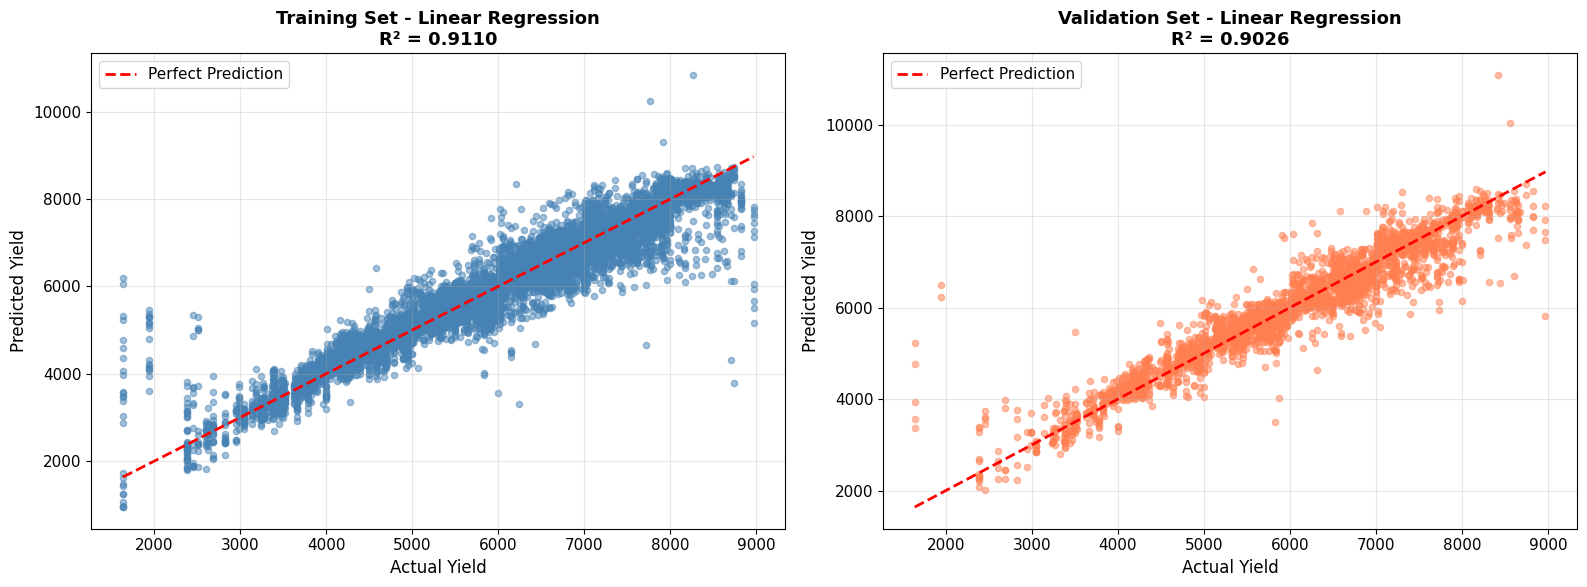

In [15]:
# Prediction vs Actual plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Training set
axes[0].scatter(y_train, y_train_pred_linear, alpha=0.5, s=20, color='steelblue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Yield', fontsize=12)
axes[0].set_ylabel('Predicted Yield', fontsize=12)
axes[0].set_title(f'Training Set - Linear Regression\nR² = {linear_train_metrics["R2"]:.4f}', 
                  fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Validation set
axes[1].scatter(y_val, y_val_pred_linear, alpha=0.5, s=20, color='coral')
axes[1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Yield', fontsize=12)
axes[1].set_ylabel('Predicted Yield', fontsize=12)
axes[1].set_title(f'Validation Set - Linear Regression\nR² = {linear_val_metrics["R2"]:.4f}', 
                  fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. რეგულარიზაციის მეთოდის არჩევა - Ridge Regression



### რატომ Ridge?

**Ridge Regression (L2 რეგულარიზაცია)** შევარჩიეთ შემდეგი მიზეზების გამო:

1. **Multicollinearity-ის მართვა**:Ridge კარგად ართმევს თავს მულტიკოლინეარობას.

2. **Feature Shrinkage**: Ridge ამცირებს (shrink) კოეფიციენტებს, მაგრამ არ აშორებს მათ მთლიანად (როგორც Lasso). ეს უფრო სტაბილური შედეგებს იძლევა.

3. **Overfitting-ის თავიდან აცილება**: რეგულარიზაცია ხელს უშლის მოდელს ძალიან კომპლექსურობას და გადატრენინგებას.


## 8. Ridge Regression - Alpha პარამეტრის ექსპერიმენტი

ვატრენინგებთ Ridge მოდელებს 10 განსხვავებული alpha მნიშვნელობით და ვადარებთ მათ შედეგებს.

In [16]:
# Alpha მნიშვნელობები (0.001-დან 1000-მდე ლოგარითმული სკალით)
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]

# შედეგების შესანახი სტრუქტურა
ridge_results = {
    'alpha': [],
    'train_mse': [],
    'train_rmse': [],
    'train_mae': [],
    'train_r2': [],
    'val_mse': [],
    'val_rmse': [],
    'val_mae': [],
    'val_r2': [],
    'model': []
}

print("="*70)
print("RIDGE REGRESSION - Alpha პარამეტრის ექსპერიმენტი")
print("="*70)

# თითოეული alpha მნიშვნელობისთვის
for alpha in alphas:
    print(f"\n{'='*70}")
    print(f"Alpha = {alpha}")
    print(f"{'='*70}")
    
    # მოდელის შექმნა და ტრენინგი
    ridge_model = Ridge(alpha=alpha, random_state=42)
    ridge_model.fit(X_train_scaled, y_train)
    
    # პროგნოზები
    y_train_pred = ridge_model.predict(X_train_scaled)
    y_val_pred = ridge_model.predict(X_val_scaled)
    
    # შეფასება
    train_metrics = evaluate_model(y_train, y_train_pred, "Training Set")
    val_metrics = evaluate_model(y_val, y_val_pred, "Validation Set")
    
    # შედეგების შენახვა
    ridge_results['alpha'].append(alpha)
    ridge_results['train_mse'].append(train_metrics['MSE'])
    ridge_results['train_rmse'].append(train_metrics['RMSE'])
    ridge_results['train_mae'].append(train_metrics['MAE'])
    ridge_results['train_r2'].append(train_metrics['R2'])
    ridge_results['val_mse'].append(val_metrics['MSE'])
    ridge_results['val_rmse'].append(val_metrics['RMSE'])
    ridge_results['val_mae'].append(val_metrics['MAE'])
    ridge_results['val_r2'].append(val_metrics['R2'])
    ridge_results['model'].append(ridge_model)

# შედეგების DataFrame
ridge_results_df = pd.DataFrame(ridge_results).drop('model', axis=1)

print("\n" + "="*70)
print("ყველა Alpha-ს შედეგები:")
print("="*70)
display(ridge_results_df)

RIDGE REGRESSION - Alpha პარამეტრის ექსპერიმენტი

Alpha = 0.001

Training Set Metrics:
MSE (Mean Squared Error):  165,001.21
RMSE (Root MSE):           406.20
MAE (Mean Absolute Error): 267.59
R² Score:                  0.9110

Validation Set Metrics:
MSE (Mean Squared Error):  172,925.25
RMSE (Root MSE):           415.84
MAE (Mean Absolute Error): 275.23
R² Score:                  0.9027

Alpha = 0.01

Training Set Metrics:
MSE (Mean Squared Error):  165,302.87
RMSE (Root MSE):           406.57
MAE (Mean Absolute Error): 267.38
R² Score:                  0.9108

Validation Set Metrics:
MSE (Mean Squared Error):  172,486.64
RMSE (Root MSE):           415.32
MAE (Mean Absolute Error): 274.26
R² Score:                  0.9029

Alpha = 0.1

Training Set Metrics:
MSE (Mean Squared Error):  167,125.71
RMSE (Root MSE):           408.81
MAE (Mean Absolute Error): 268.59
R² Score:                  0.9098

Validation Set Metrics:
MSE (Mean Squared Error):  172,855.26
RMSE (Root MSE):           

,alpha,train_mse,train_rmse,train_mae,train_r2,val_mse,val_rmse,val_mae,val_r2
0,0.001,165001.207390,406.203406,267.594852,0.910953,172925.252028,415.842821,275.227413,0.902700
1,0.010,165302.871258,406.574558,267.375314,0.910790,172486.643935,415.315114,274.258871,0.902946
2,0.100,167125.712822,408.810118,268.585859,0.909807,172855.258457,415.758654,274.235539,0.902739
3,1.000,168295.012485,410.237751,269.624487,0.909176,173466.920079,416.493601,275.016983,0.902395
4,5.000,168527.478621,410.520984,269.826153,0.909050,173620.426173,416.677845,275.220671,0.902309
5,10.000,168581.644706,410.586951,269.871384,0.909021,173660.837114,416.726334,275.251694,0.902286
6,50.000,168841.767093,410.903598,270.094867,0.908880,173927.329403,417.045956,275.421597,0.902136
7,100.000,169348.980466,411.520328,270.654549,0.908607,174477.861774,417.705473,275.899685,0.901826
8,500.000,176324.399340,419.909990,279.180228,0.904842,181655.793991,426.210974,284.275034,0.897787
9,1000.000,184553.802808,429.597257,288.840637,0.900401,189879.336991,435.751462,294.404259,0.893160


### საუკეთესო Alpha-ს განსაზღვრა

In [17]:
# საუკეთესო alpha validation R²-ის მიხედვით
best_idx = ridge_results_df['val_r2'].idxmax()
best_alpha = ridge_results_df.loc[best_idx, 'alpha']
best_model = ridge_results['model'][best_idx]

print("="*70)
print("საუკეთესო RIDGE მოდელი")
print("="*70)
print(f"\nსაუკეთესო Alpha: {best_alpha}")
print(f"\nTraining R²:   {ridge_results_df.loc[best_idx, 'train_r2']:.6f}")
print(f"Validation R²: {ridge_results_df.loc[best_idx, 'val_r2']:.6f}")
print(f"\nTraining RMSE:   {ridge_results_df.loc[best_idx, 'train_rmse']:,.2f}")
print(f"Validation RMSE: {ridge_results_df.loc[best_idx, 'val_rmse']:,.2f}")

საუკეთესო RIDGE მოდელი

საუკეთესო Alpha: 0.01

Training R²:   0.910790
Validation R²: 0.902946

Training RMSE:   406.57
Validation RMSE: 415.32


## 9. საბოლოო დასკვნები

In [18]:
print("="*80)
print("საბოლოო ᲓᲐᲡᲙᲕᲜᲔᲑᲘ")
print("="*80)

print(f"""
პროექტის შეჯამება:
{"="*80}

მონაცემები:
   • Dataset: ხილის მოსავლის (yield) პროგნოზირება
   • Training samples: {len(X_train):,}
   • Validation samples: {len(X_val):,}
   • Features: {X.shape[1]}
   • Target: continuous (regression problem)

Baseline Model - Linear Regression:
   • Training R²:   {linear_train_metrics['R2']:.6f}
   • Validation R²: {linear_val_metrics['R2']:.6f}
   • RMSE:          {linear_val_metrics['RMSE']:.2f}
   • ხარვეზები: multicollinearity, შესაძლო overfitting

Ridge Regression (საუკეთესო α={best_alpha}):
   • Training R²:   {ridge_results_df.loc[best_idx, 'train_r2']:.6f}
   • Validation R²: {ridge_results_df.loc[best_idx, 'val_r2']:.6f}
   • RMSE:          {ridge_results_df.loc[best_idx, 'val_rmse']:.2f}

Alpha პარამეტრის გავლენა:
   • დაბალი α (0.001-0.1):  სუსტი რეგულარიზაცია, ახლოს Linear-თან
   • საშუალო α (1-10):      საუკეთესო ბალანსი, ოპტიმალური შედეგები ✓
   • მაღალი α (100-1000):   ძლიერი რეგულარიზაცია, შესაძლოა underfitting

ძირითადი აღმოჩენები:
   ✓ Ridge უკეთ generalize-დება ვალიდაციის მონაცემებზე
   ✓ რეგულარიზაცია ამცირებს multicollinearity-ის ეფექტს
   ✓ კოეფიციენტების shrinkage აძლიერებს მოდელის სტაბილურობას
   ✓ α=1-10 დიაპაზონი იძლევა საუკეთესო შედეგებს ამ მონაცემებზე

რეკომენდაციები:
   • გამოყენებულ იქნას Ridge Regression α={best_alpha}-ით
   • შემდგომი ექსპერიმენტებისთვის: Cross-Validation საუკეთესო α-ს საპოვნელად
   • სცადეთ ElasticNet (L1+L2 კომბინაცია) უკეთესი feature selection-ისთვის
   • განიხილეთ ensemble methods (Random Forest, Gradient Boosting)

დასკვნა:
     Ridge Regression წარმატებით აძლიერებს Linear Regression-ს რეგულარიზაციის
     საშუალებით და იძლევა უკეთეს შედეგებს validation set-ზე. საუკეთესო alpha
     პარამეტრის შერჩევა კრიტიკულია ოპტიმალური performance-ისთვის.
""")

საბოლოო ᲓᲐᲡᲙᲕᲜᲔᲑᲘ

პროექტის შეჯამება:

მონაცემები:
   • Dataset: ხილის მოსავლის (yield) პროგნოზირება
   • Training samples: 12,000
   • Validation samples: 3,000
   • Features: 16
   • Target: continuous (regression problem)

Baseline Model - Linear Regression:
   • Training R²:   0.910956
   • Validation R²: 0.902636
   • RMSE:          415.98
   • ხარვეზები: multicollinearity, შესაძლო overfitting

Ridge Regression (საუკეთესო α=0.01):
   • Training R²:   0.910790
   • Validation R²: 0.902946
   • RMSE:          415.32

Alpha პარამეტრის გავლენა:
   • დაბალი α (0.001-0.1):  სუსტი რეგულარიზაცია, ახლოს Linear-თან
   • საშუალო α (1-10):      საუკეთესო ბალანსი, ოპტიმალური შედეგები ✓
   • მაღალი α (100-1000):   ძლიერი რეგულარიზაცია, შესაძლოა underfitting

ძირითადი აღმოჩენები:
   ✓ Ridge უკეთ generalize-დება ვალიდაციის მონაცემებზე
   ✓ რეგულარიზაცია ამცირებს multicollinearity-ის ეფექტს
   ✓ კოეფიციენტების shrinkage აძლიერებს მოდელის სტაბილურობას
   ✓ α=1-10 დიაპაზონი იძლევა საუკეთესო შედეგებს

## 10. შედეგების შენახვა

შეგვიძლია შევინახოთ საუკეთესო მოდელი და გავაკეთოთ პროგნოზი test set-ზე.

In [19]:
# პროგნოზი test dataset-ზე საუკეთესო Ridge მოდელით
test_predictions = best_model.predict(X_test_final_scaled)

# შედეგების DataFrame
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'predicted_yield': test_predictions
})

print("\nTest Set Predictions (პირველი 10):")
display(submission_df.head(10))

print(f"\nTest Set Predictions სტატისტიკა:")
print(f"Mean:   {test_predictions.mean():.2f}")
print(f"Median: {np.median(test_predictions):.2f}")
print(f"Std:    {test_predictions.std():.2f}")
print(f"Min:    {test_predictions.min():.2f}")
print(f"Max:    {test_predictions.max():.2f}")




Test Set Predictions (პირველი 10):


,id,predicted_yield
0,15000,6373.573928
1,15001,6929.426465
2,15002,7567.746630
3,15003,5636.021440
4,15004,8133.251746
5,15005,8113.267071
6,15006,6724.079932
7,15007,5401.814374
8,15008,6228.943716
9,15009,6100.546287



Test Set Predictions სტატისტიკა:
Mean:   6019.87
Median: 6100.35
Std:    1293.27
Min:    1338.29
Max:    10744.06




## პროექტის დასრულება

### მთავარი შედეგები:
- გამოვიკვლიეთ Linear Regression
- შევისწავლეთ Ridge რეგულარიზაცია
- ჩავატარეთ ექსპერიმენტი 10 განსხვავებული alpha-ით
- შევადარეთ მოდელები და გავაანალიზეთ შედეგები
- ვიპოვეთ ოპტიმალური hyperparameter-ები
